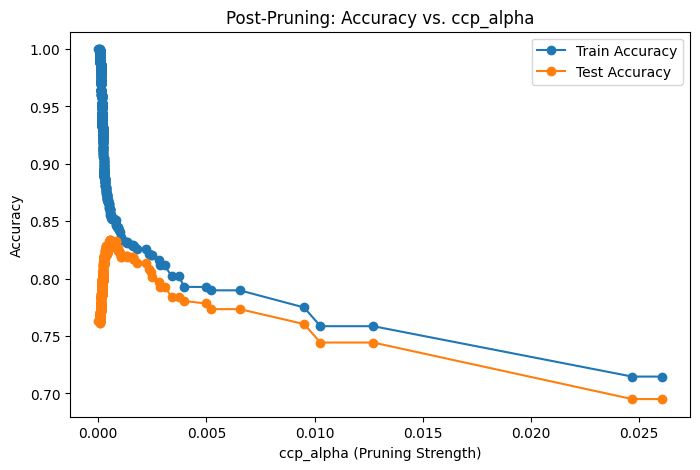

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# Load dataset
df = pd.read_csv("bank.csv")

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Store encoders in case we need inverse transform

# Define features and target
X = df.drop(columns=["deposit"])  # Features
y = df["deposit"]  # Target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an initial decision tree to get ccp_alphas
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Get ccp_alphas and corresponding impurities
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Remove extreme values
ccp_alphas = ccp_alphas[:-1]

# Train trees with different ccp_alpha values
train_accuracies, test_accuracies = [], []
for alpha in ccp_alphas:
    pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    pruned_tree.fit(X_train, y_train)
    train_accuracies.append(pruned_tree.score(X_train, y_train))
    test_accuracies.append(pruned_tree.score(X_test, y_test))

# Plot accuracy vs. ccp_alpha
plt.figure(figsize=(8, 5))
plt.plot(ccp_alphas, train_accuracies, marker="o", label="Train Accuracy")
plt.plot(ccp_alphas, test_accuracies, marker="o", label="Test Accuracy")
plt.xlabel("ccp_alpha (Pruning Strength)")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Post-Pruning: Accuracy vs. ccp_alpha")
plt.show()